# Лабораторная работа 1 (Регрессионный анализ)

ФИО                  |Вариант  |Никнейм
---------------------|---------|----------
Елистратова П. А.    |    6    | TIoJIuHa

**Цель:** научится применять модели линейной регрессии библиотеки scikit-learn к набору эмпирических данных

**Дано:** сsv-файл

**Результат:** эмпирическая формула

**Ход выполнения:** 
1. Загрузить данные из файла.
2. Визуализировать загруженные данные (диаграмма рассеяния, график).
3. Разбить данные на обучающую и тестовую выборки.
4. Выбрать модель регрессии.
5. Обучить модель регрессии на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.



## Загрузка датасета

In [8]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/01/18/d154dc1638803adf987910cdd07097d9c526663a55666a97c124d09fb96a/scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.10.0 from https://files.pythonhosted.org/packages/7c/89/d70e9f628749b7e4db2aa4cd89735502ff3f08f7b9b27d2e799485987cd9/scipy-1.16.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 730.2 kB/s eta 0:00:0000:010:01
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/1e/e8/685f47e0d754320684db4425a0967f7d3fa70126bffd76110b7009a0090f/joblib-1.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.2.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-no

In [3]:
import pandas as pd

raw_data = pd.read_csv('../../tasks/lab1/dataset/lab1-06.csv', header=None, names=["X", "Y"])
raw_data.head(10)

,X,Y
0,2.777778,-4.237752
1,1.000000,-13.819515
2,6.737374,1.477926
3,8.919192,1.597961
4,6.212121,0.486355
5,5.808081,1.128998
6,7.383838,1.773272
7,8.757576,2.256161
8,7.585859,2.664037
9,1.727273,-10.523624


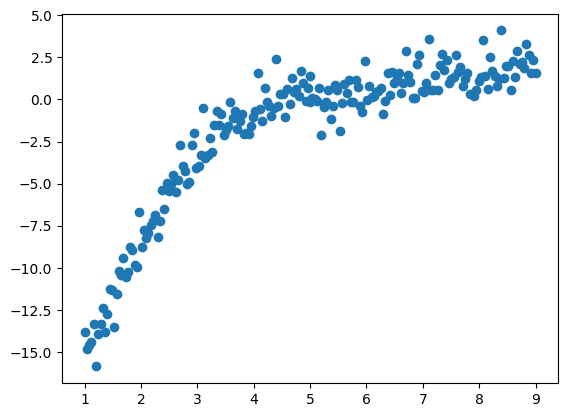

In [4]:
import matplotlib.pyplot as plt

plt.scatter(raw_data.X, raw_data.Y)

## Метрики

В качестве метрик в задаче регрессии использовались MSE и r2-score:
- MSE(среднеквадратичная ошибка) из-за возведения в квадрат сильнее штрафует ошибки. Подходит, если большие отклонения критически важны.
- r2-score(коэффициент детерминации) удобен для оценки общей точности модели.

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

def print_evaluation(y_test, y_pred):
    print("MSE error:", mean_squared_error(y_test, y_pred))
    print("R^2 score:", r2_score(y_test, y_pred))

## Создание бейзлайна и оценка качества

In [6]:
def plot_predictions(test_x, test_y, pred_y):
    plt.scatter(test_x, test_y, color="green", label="Исходные данные")
    plt.scatter(test_x, pred_y, color="red", label="Предсказанные данные")
    plt.xlabel("X")
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Разделим исходные данные на обучающую и тестовую выборки

In [7]:
from sklearn.model_selection import train_test_split

raw_x = raw_data["X"].to_frame()
raw_y = raw_data["Y"].to_frame()

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

Для обучения возьмем модель линейной регрессии из библиотеки sklearn.

In [8]:
from sklearn.linear_model import LinearRegression

modelLinearRegression = LinearRegression()
modelLinearRegression.fit(raw_x_train, raw_y_train)

linear_pred = modelLinearRegression.predict(raw_x_test)
print_evaluation(raw_y_test, linear_pred)

MSE error: 7.2024229647313
R^2 score: 0.6818264979713569


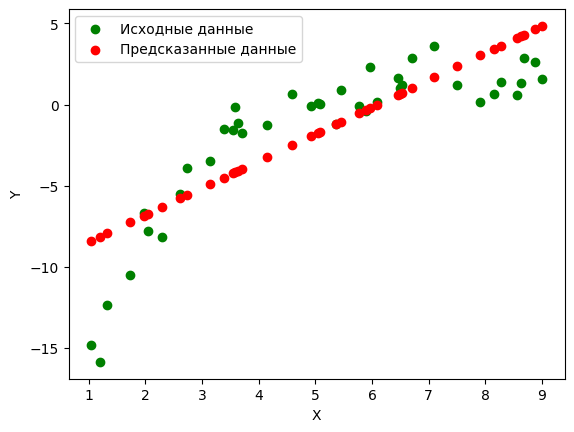

In [9]:
plot_predictions(raw_x_test, raw_y_test, linear_pred)

Модель показала достаточно высокую ошибку. Попытка аппроксимировать данные прямой линией не увенчалась успехом.

## Улучшенный бейзлайн

Заметим что распределение данных имеет нелинейную зависимость, а для аппроксимации в таком случае хорошо подойдет полиномиальная регрессия. Попробуем подобрать степень полинома с помощью GridSearchCV.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5, 6, 7, 8],
}

pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(raw_x_train, raw_y_train)

print('Лучшие параметры:', grid.best_params_)

Лучшие параметры: {'polynomialfeatures__degree': 6}


In [11]:
polinomial_pred = grid.predict(raw_x_test)
print_evaluation(raw_y_test, polinomial_pred)


MSE error: 1.0778923950444148
R^2 score: 0.9523831355335964


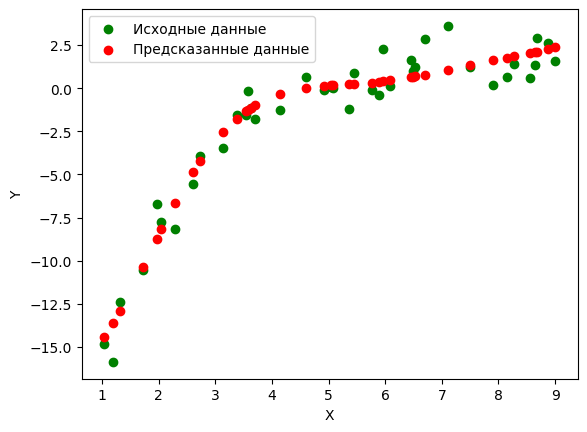

In [12]:
plot_predictions(raw_x_test, raw_y_test, polinomial_pred)

MSE error: 0.7107910962318101
R^2 score: 0.9652702233721828


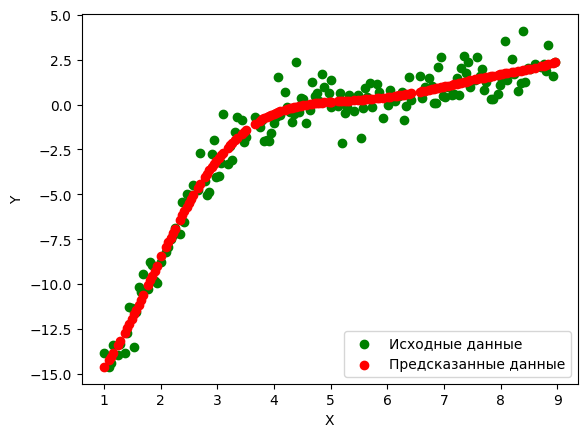

In [13]:
polinomial_pred_train = grid.predict(raw_x_train)
print_evaluation(raw_y_train, polinomial_pred_train)
plot_predictions(raw_x_train, raw_y_train, polinomial_pred_train)

Получили очень хорошие значения метрик и на тестовой выборке и на тренировочной. Конечно, существует риск переобучения модели при такой высокой степени полинома и небольшом количестве данных, но R^2 близко к 1 в обоих случаях, значит модель хорошо обобщается и результаты приемлемые.

## Выводы

При выполнении данной лаборатоной работы удалось поработать с библиотекой scikit-learn и обучить модели регрессии.

В результате получились следующие показатели:

|                         |  MSE  |  R^2  |
|-------------------------|-------|-------|
|Линейная регрессия       | 7.202 | 0.682 |
|Полиноминальная регрессия| 1.078 | 0.952 |